# Upper Confidence Bound (UCB)

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [23]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [24]:
import math
N = 1000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(N):
  ad = 0
  max_upper_bound = 0
  for i in range(10):
    if number_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i 
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
  

## Visualising the results

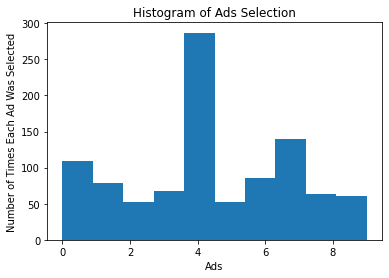

In [25]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Number of Times Each Ad Was Selected')
plt.show()